# Stroke Data Implementation 1

In [61]:
# Import libraries
import pandas as pd
import numpy as 
import lightgbm
from sklearn.metrics import f1_scorerchCV

In [62]:
# Read in preprocessed data
x_train = pd.read_csv('data/x_train.csv')
x_test = pd.read_csv('data/x_test.csv')
y_train = pd.read_csv('data/y_train.csv')
y_test = pd.read_csv('data/y_test.csv')

## LightGBM Model



In [83]:
#
# Create the LightGBM data containers
#train_data = lightgbm.Dataset(x_train, label=y_train, params={"max_bin":100})
test_data = lightgbm.Dataset(x_test, label=y_test, params={"max_bin":100})


### Test with defaults

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[1]	valid_0's f1: 0
Training until validation scores don't improve for 100 rounds
[2]	valid_0's f1: 0
[3]	valid_0's f1: 0
[4]	valid_0's f1: 0
[5]	valid_0's f1: 0
[6]	valid_0's f1: 0.0877193
[7]	valid_0's f1: 0.294643
[8]	valid_0's f1: 0.302326
[9]	valid_0's f1: 0.315789
[10]	valid_0's f1: 0.318937
[11]	valid_0's f1: 0.322368
[12]	valid_0's f1: 0.321311
[13]	valid_0's f1: 0.333333
[14]	valid_0's f1: 0.309677
[15]	valid_0's f1: 0.319218
[16]	valid_0's f1: 0.337662
[17]	valid_0's f1: 0.324841
[18]	valid_0's f1: 0.321543
[19]	valid_0's f1: 0.315113
[20]	valid_0's f1: 0.298701
[21]	valid_0's f1: 0.313725
[22]	valid_0's f1: 0.308176
[23]	valid_0's f1: 0.302251
[24]	valid_0's f1: 0.306189
[25]	valid_0's f1: 0.302632
[26]	valid_0's f1: 0.299003
[27]	valid_0's f1: 0.302013
[28]	valid_0's f1: 0.30303
[29]	valid_0's f1: 0.300341
[30]	valid

<AxesSubplot:title={'center':'Metric during training'}, xlabel='Iterations', ylabel='f1'>

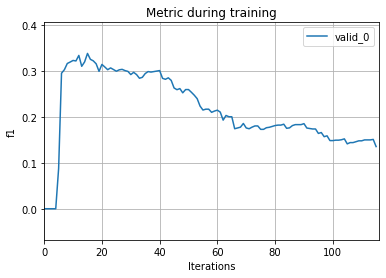

In [84]:
#
# Train the model
#

def lgb_f1_score(y_hat, data):
    y_true = data.get_label()
    y_hat = np.round(y_hat) # scikits f1 doesn't like probabilities
    return 'f1', f1_score(y_true, y_hat), True

evals_result = {}

parameters = {
    'objective': 'binary',
    'is_unbalance': 'true',
    'metric': 'custom',
    'force_col_wise': 'true',
    'verbose': 0}

model = lightgbm.train(parameters,
                       train_data,
                       feval=lgb_f1_score,
                       evals_result=evals_result,
                       valid_sets=test_data,
                       num_boost_round=5000,
                       early_stopping_rounds=100)

lightgbm.plot_metric(evals_result, metric='f1')

### Tweak hyperparameters

sers\eohara\Anaconda3\lib\site-packages\lightgbm\callback.py:186: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
C:\Users\eohara\Anaconda3\lib\site-packages\lightgbm\callback.py:186: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
C:\Users\eohara\Anaconda3\lib\site-packages\lightgbm\callback.py:186: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
C:\Users\eohara\Anaconda3\lib\site-packages\lightgbm\callback.py:186: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
C:\Users\eohara\Anaconda3\lib\site-packages\lightgbm\callback.py:186: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
[LightGBM] [Warning] No further splits with 

<AxesSubplot:title={'center':'Metric during training'}, xlabel='Iterations', ylabel='f1'>

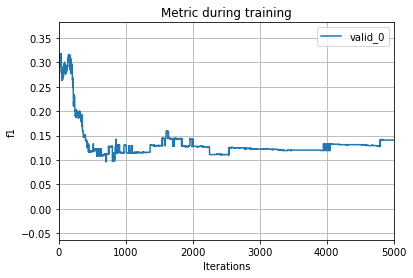

In [86]:
#
# Train the model
#

evals_result = {}

parameters = {
    'boosting': 'dart',
    'objective': 'binary',
    'scale_pos_weight': 99,
    'metric': 'custom',
    'num_leaves': 70,
    'force_col_wise':'true',
    'bagging_freq': 50,
    'verbose': 0
    }

model = lightgbm.train(parameters,
                       train_data,
                       feval=lgb_f1_score,
                       evals_result=evals_result,
                       valid_sets=test_data,
                       num_boost_round=5000,
                       early_stopping_rounds=100)

lightgbm.plot_metric(evals_result, metric='f1')